# Homework 7

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import ipympl
%matplotlib inline

import random
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from imageio import imread, imsave

In our homework, you will again be using the iris data set to create a linear model based on Sepal Length vs the Sepal Width. We will start by creating the scatter plot of the Sepal Length and Sepal Width. First, make training and testing data using iris dataset.

In [17]:
iris = pd.read_csv("Iris.csv") 

iris_train, iris_test = train_test_split(iris, 
                                       test_size = .2, 
                                       random_state = 0) 

iris_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
137,138,6.4,3.1,5.5,1.8,Iris-virginica
84,85,5.4,3.0,4.5,1.5,Iris-versicolor
27,28,5.2,3.5,1.5,0.2,Iris-setosa
127,128,6.1,3.0,4.9,1.8,Iris-virginica
132,133,6.4,2.8,5.6,2.2,Iris-virginica


Now we will create a model of the SepalengthCm vs SepalWidthCm based on the training data. Make sure to create test data as well.

In [18]:
X_train = np.asmatrix(iris_train[['SepalLengthCm']])
y_train = np.array(iris_train['PetalLengthCm'])


X_test = np.asmatrix(iris_test[['SepalLengthCm']])


linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


LinearRegression()

Using the function given below, create a scatterplot of the Sepal Length vs Petal Length.

In [19]:
def overlay_simple_linear_model(data, x_name, y_name, linear_model):
    """
    This function plots a simple linear model on top of the scatterplot of the data it was fit to.
    
    data(DataFrame): e.g. mpg_train
    x_name(string): the name of the column representing the predictor variable
    y_name(string): the name of the column representing the dependent/response variable
    linear_model
    
    returns None but outputs linear model overlaid on scatterplot
    """
    
    x = np.arange(max(data[x_name])).reshape(-1, 1) # a 2D array of integers between 0 and the maximum value of the x_name column
    y = linear_model.predict(x)
    
    
    data.plot.scatter(x_name,y_name) # scatter plot of x_name vs. y_name
    
    plt.plot(x,y)
    plt.title("Linear Model vs. Data: " + x_name + " vs. " + y_name)
    plt.show()

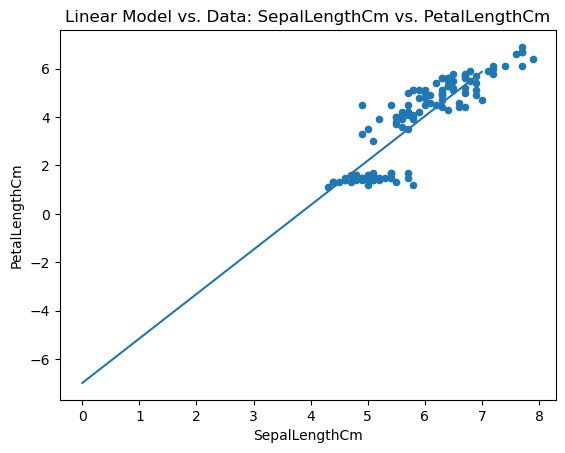

In [20]:
overlay_simple_linear_model(iris_train, 'SepalLengthCm','PetalLengthCm', linear_model)

Now let's use the mpg data again. Create the training and test data. With the X variable this time being weight and the y variable being mpg.

In [47]:
mpg = pd.read_csv("mpg.csv", index_col="name") 

# Remove rows that have missing horsepower
mpg = mpg.loc[mpg["horsepower"] != '?'].astype(int) 

mpg_train, mpg_test = train_test_split(mpg, 
                                       test_size = .2, 
                                       random_state = 0) 

# Train, validation split
mpg_train, mpg_validation = train_test_split(mpg_train, 
                                             test_size = .25, 
                                             random_state = 0)

# Notice that the splitting above creates a 60/20/20 split
mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
plymouth satellite sebring,18,6,225,105,3613,16,74,1
vw rabbit,29,4,90,70,1937,14,76,2
dodge coronet custom,15,8,318,150,3777,12,73,1
plymouth reliant,27,4,135,84,2490,15,81,1
vw rabbit c (diesel),44,4,90,48,2085,21,80,2


In [48]:
X_train = np.asmatrix(mpg_train[['weight']])
y_train = np.array(mpg_train['mpg'])

X_val = np.asmatrix(mpg_validation[['weight']])
y_val = np.array(mpg_validation['mpg'])

X_test = np.asmatrix(mpg_test[['weight']])

print(X_train.shape)
print(y_train.shape)

(234, 1)
(234,)


Use function below from lecture to make a polynomial model.

In [50]:
def polynomial_regression(degree, X, y):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)
    
    poly.fit(X_poly, y)
    
    linear_model = LinearRegression()
    linear_model = linear_model.fit(X_poly, y)
    
    x_range = np.arange(min(np.asarray(X.flatten())[0]), 
                  max(np.asarray(X.flatten())[0]) + .001, .001).reshape((-1, 1))

    predicted = linear_model.predict(poly.fit_transform(x_range))
    
    fig, ax = plt.subplots(figsize=(10, 8))

    plt.title("Polynomial Degree " + str(degree))
    plt.xlabel("Height")
    plt.ylabel("Weight")
    plt.plot(x_range, predicted, color='red')
    plt.scatter(mpg.weight, mpg.mpg)
    return linear_model, poly
def polynomial_predict(linear_model, poly, X):
    return linear_model.predict(poly.fit_transform(X))
def compute_mse(pred, actual):
    return mean_squared_error(pred, actual, squared=True)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


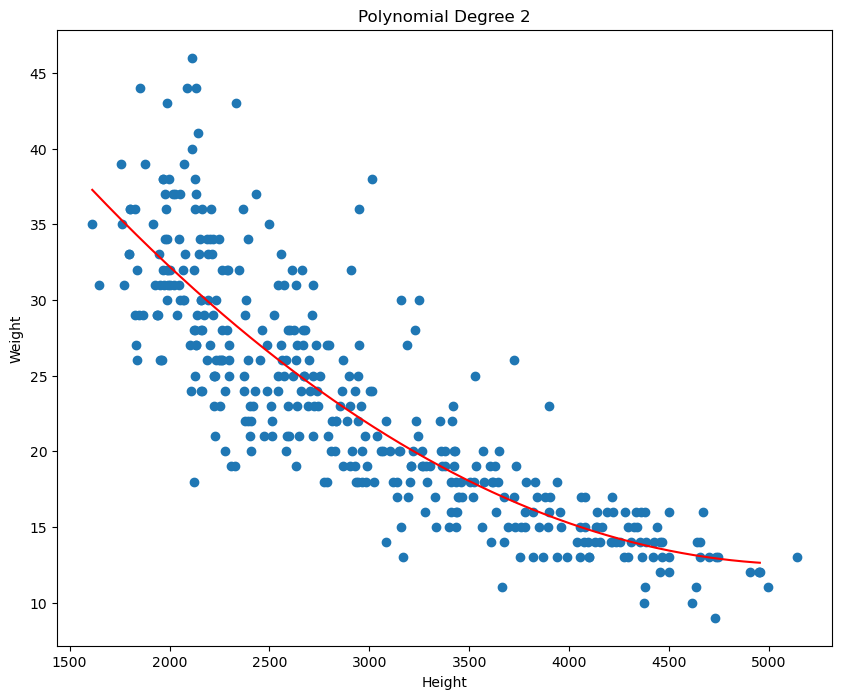

In [51]:
model_deg2, poly_deg2 = polynomial_regression(2, X_train, y_train)

Do you believe the linear model is the best model for this case. If not which degree of polynomial regression would be the best for this case?

**Write your answer here:**